In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import statsmodels.api as sm
from scipy.spatial import ConvexHull
from scipy.stats import normaltest, shapiro, anderson, norm, t as t_stud
from sklearn.decomposition import PCA

# UTILITIES, LOADING AND CHECKING

The idea is test some algorithm in order to achieve the 1% of outliers in the data, plot it using one dimensionality reduction tecnique and after that decide a task of manipulation with them.

In [ ]:
# we use the dataset without duplicated columns

X_train = pd.read_csv('X_train_nocorrelation.csv', header = 0)
y_train = pd.read_fwf('y_train.txt', header = None)
X_test = pd.read_csv('X_test_nocorrelation.csv', header = 0)
y_test = pd.read_fwf('y_test.txt', header = None)

In [ ]:
X_train.columns = X_train.columns.astype(int)
X_test.columns = X_test.columns.astype(int)


In [ ]:
type(y_test)

pandas.core.frame.DataFrame

In [ ]:
with open("features.txt") as f:
    lines = f.read().splitlines()

In [ ]:
features = {}
for line in lines:
    idx, name = line.split()
    features[int(idx)-1] = name

In [ ]:
with open('activity_labels.txt') as f:
    lines = f.read().splitlines()

activities = {}
for line in lines:
    label, activity = line.split()
    activities[int(label)] = activity

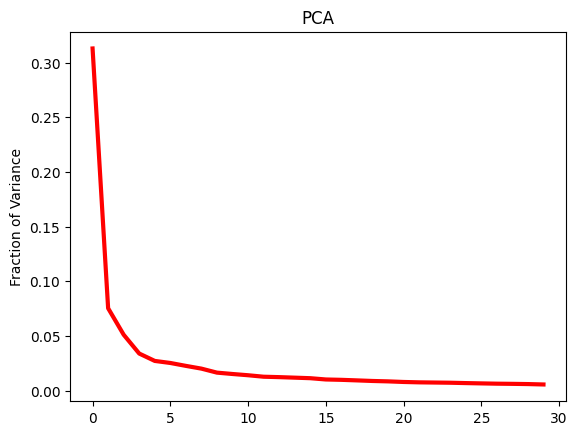

In [ ]:
plt.plot(PCA(n_components=30).fit(X_train).explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.show()

In [ ]:
X_train_pca = PCA(2, random_state = 5).fit_transform(X_train)

Checking the presence of duplicated in the data.

In [ ]:
X_train.duplicated().value_counts()

False    7352
dtype: int64

In [ ]:
X_test.duplicated().value_counts()

False    2947
dtype: int64

In [ ]:
y_train.duplicated().value_counts()

True     7346
False       6
dtype: int64

In [ ]:
y_test.duplicated().value_counts()

True     2941
False       6
dtype: int64

In [ ]:

print('\n Distinct values:')
print(X_train.nunique())



 Distinct values:
0      7347
1      7352
2      7349
10     5204
11     5216
       ... 
556    7352
557    7352
558    7352
559    7352
560    7352
Length: 269, dtype: int64


In [ ]:
print('\n Distinct values:')
print(X_test.nunique())


 Distinct values:
0      2947
1      2947
2      2947
10     2108
11     2077
       ... 
556    2947
557    2947
558    2947
559    2947
560    2947
Length: 269, dtype: int64


In [ ]:
print('\n Distinct values:')
print(y_train.nunique())


 Distinct values:
0    6
dtype: int64


In [ ]:
print('\n Distinct values:')
print(y_test.nunique())


 Distinct values:
0    6
dtype: int64


In [ ]:
# Controllo dei missing values
missing_values = X_train.isna().any()

print(missing_values)

0      False
1      False
2      False
10     False
11     False
       ...  
556    False
557    False
558    False
559    False
560    False
Length: 269, dtype: bool


In [ ]:
# Controllo dei missing values
missing_values = X_test.isna().any()

print(missing_values)

0      False
1      False
2      False
10     False
11     False
       ...  
556    False
557    False
558    False
559    False
560    False
Length: 269, dtype: bool


In [ ]:
# Controllo dei missing values
missing_values = y_train.isna().any()

print(missing_values)

0    False
dtype: bool


In [ ]:
# Controllo dei missing values
missing_values = y_test.isna().any()

print(missing_values)

0    False
dtype: bool


In [ ]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.0-py3-none-any.whl size=185331 sha256=ce57841b61b93a2e00b6a1ba2f7c586daa211db431dcfa4ee5202cd77546306e
  Stored in directory: /root/.cache/pip/wheels/36/8e/e2/e932956b10b843eb6be9eefa70b5c1bee7b561be14c423b136
Successfully built pyod


# HBOS

In [ ]:
from pyod.models.hbos import HBOS

In [ ]:
hbos=HBOS(contamination=0.01)
hbos.fit(X_train_pca)

HBOS(alpha=0.1, contamination=0.01, n_bins=10, tol=0.5)

In [ ]:
hbos.decision_scores_


array([2.83639008, 2.83342177, 2.83639008, ..., 4.32755689, 4.32755689,
       4.32755689])

In [ ]:
X_test_pca = PCA(2, random_state = 5).fit_transform(X_test)

In [ ]:
outliers_hbos= hbos.predict(X_test_pca)
np.unique(outliers_hbos, return_counts=True)

(array([0, 1]), array([2944,    3]))

In [ ]:
X_train.loc[np.where(outliers_hbos==1)]

,0,1,2,10,11,14,22,23,24,26,...,550,551,553,554,555,556,557,558,559,560
789,0.284824,0.006479,-0.109930,0.081067,-0.545412,0.588799,0.345742,0.265901,0.090320,0.201795,...,-0.904762,0.106799,-0.042194,-0.035327,-0.364083,-0.549581,0.662388,-0.938876,0.135728,0.038609
790,0.311495,0.009546,-0.098184,0.039711,-0.545796,0.628266,0.480664,0.381985,0.077735,0.316471,...,-0.904762,0.115757,-0.240903,-0.248480,0.073686,0.046367,0.577737,-0.946196,0.132217,0.034040
1485,0.283022,-0.013180,-0.116041,-0.529431,-0.791180,0.814637,-0.380648,-0.221036,-0.530772,-0.070084,...,-1.000000,-0.266178,-0.259797,-0.091090,0.175397,0.510981,-0.617541,-0.818809,0.196526,-0.062864


In [ ]:
outliers_hbos

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("The threshold for the defined comtanimation rate:" , hbos.threshold_)

The threshold for the defined comtanimation rate: 5.959542641413614


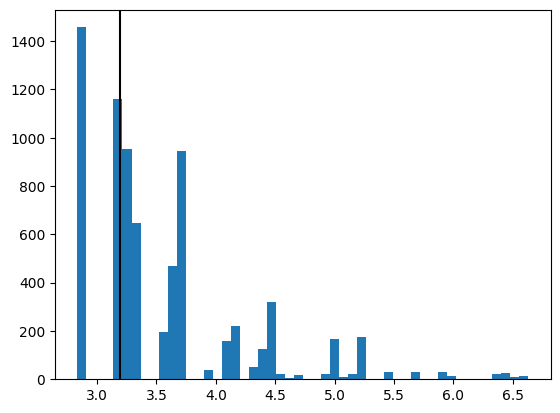

In [ ]:
plt.hist(hbos.decision_scores_, bins=50)
plt.axvline(np.min(hbos.decision_scores_[np.where(outliers_hbos==1)]), c='k')
plt.show()


# ELLIPTIC ENVELOPE

Since elliptic envelope assume that the data are normally distributed, we decide to perform a dimensionality reduction using T-SNE. The latter perform a kind of space modification using the concept of probability, the re-ordering is done according to a normal distribution. So the algorithm might perform well.

In [ ]:
from sklearn.covariance import EllipticEnvelope
from sklearn.decomposition import PCA

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
X_train

,0,1,2,10,11,14,22,23,24,26,...,550,551,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.567378,-0.744413,0.814263,-0.407747,-0.679338,-0.602122,-0.853011,...,-1.000000,-0.074323,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.557851,-0.818409,0.822637,-0.714892,-0.500930,-0.570979,-0.329549,...,-1.000000,0.158075,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.557851,-0.818409,0.839344,-0.592235,-0.485821,-0.570979,-0.086309,...,-0.555556,0.414503,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.576159,-0.829711,0.837869,-0.627446,-0.850930,-0.911872,0.074840,...,-0.936508,0.404573,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.569174,-0.824705,0.837869,-0.786553,-0.559477,-0.761434,-0.131208,...,-0.936508,0.087753,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,0.029369,-0.076700,0.266917,0.195643,0.140158,-0.082077,0.426433,...,-0.904762,-0.070157,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,0.029369,-0.031966,0.266917,0.178138,0.293566,-0.051532,0.149854,...,-0.904762,0.165259,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.110405,0.055411,0.264670,0.173131,0.276040,0.152003,0.200784,...,-0.904762,0.195034,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.149495,0.055411,0.264670,0.160333,0.246561,0.021678,0.296546,...,-0.904762,0.013865,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [ ]:
tsne=TSNE(n_components=2)
X_tsne=tsne.fit_transform(X_train)
X_tsne.shape

(7352, 2)

In [ ]:
ellenv=EllipticEnvelope(random_state=1, contamination=0.01)
ellenv.fit(X_tsne)
#label approaches

EllipticEnvelope(contamination=0.01, random_state=1)

In [ ]:
outliers_ellenv=ellenv.predict(X_tsne)

In [ ]:
np.unique(outliers_ellenv,return_counts=True)

(array([-1,  1]), array([  74, 7278]))

In [ ]:
ellenv.get_params()

{'assume_centered': False,
 'contamination': 0.01,
 'random_state': 1,
 'store_precision': True,
 'support_fraction': None}

In [ ]:
nomalX_train.loc[np.where(outliers_ellenv==-1)]

,0,1,2,10,11,14,22,23,24,26,...,550,551,553,554,555,556,557,558,559,560
1741,0.153648,-0.028786,-0.108040,0.138353,-0.119567,0.400868,0.253299,0.271235,0.100322,-0.114830,...,-0.873016,0.347082,-0.869634,0.662488,0.492844,0.284403,-0.260948,-0.684937,0.315806,0.019422
1748,0.231570,-0.035339,-0.037536,0.090780,-0.135501,0.213649,0.323706,0.394322,0.108665,0.141882,...,-0.904762,0.172030,-0.827505,0.163395,-0.565885,0.372701,-0.042576,-0.699440,0.305611,0.026784
1754,0.162781,-0.031743,-0.146423,0.145638,-0.116604,0.476378,0.339343,0.338996,-0.247197,0.270840,...,-0.619048,0.366831,-0.951207,0.538271,0.443406,-0.495401,-0.247945,-0.689131,0.312044,-0.001719
1755,0.240884,0.001575,-0.072271,0.145638,-0.084671,0.208041,0.354555,0.430417,-0.104723,0.307392,...,-0.682540,0.348061,-0.834748,0.410170,-0.770378,0.779197,-0.143000,-0.686906,0.314390,0.012589
1842,0.239208,0.043560,-0.142568,0.342515,-0.328282,0.230203,0.300214,0.369310,0.311763,-0.022143,...,-0.873016,0.338235,-0.820468,0.164262,-0.253412,-0.920562,0.846586,-0.619270,0.204693,0.266906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,0.279536,-0.007554,-0.170869,0.152701,0.067876,0.698443,0.327203,0.350375,0.361923,-0.070320,...,-0.873016,0.163129,-0.851154,-0.244621,0.181166,-0.313127,-0.060476,-0.488711,0.254964,0.341705
2513,0.244453,0.000321,-0.117142,0.155431,0.046435,0.632858,0.360954,0.427212,0.451114,-0.059691,...,-0.904762,0.084275,-0.729381,0.400313,0.750426,0.570912,-0.040116,-0.490321,0.255919,0.339879
2514,0.306066,-0.082031,-0.137626,0.155431,-0.016859,0.632858,0.266096,0.362870,0.458687,0.169379,...,-0.873016,0.130566,-0.521736,-0.311993,0.477063,-0.497790,-0.453062,-0.489468,0.258590,0.338957
2515,0.286149,-0.040630,-0.014627,0.105133,0.035324,0.193854,0.154546,0.385643,0.578896,0.164521,...,-0.873016,0.167763,-0.779700,0.174597,0.254233,-0.954249,-0.072519,-0.475772,0.273277,0.340633


In [ ]:
anomlay_score_ellenv = ellenv.decision_function(X_train_pca)

In [ ]:
anomlay_score_ellenv

array([11.61630192, 11.5982414 , 11.60248359, ..., 11.30689654,
       11.29099109, 11.31956195])

In [ ]:
np.mean(anomlay_score_ellenv[np.where(outliers_ellenv==1)])

11.490238729966674

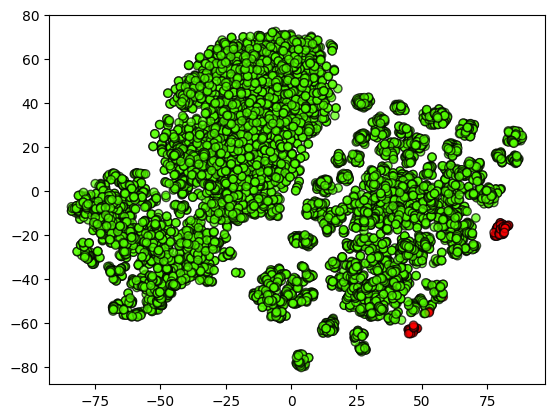

In [ ]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=outliers_ellenv, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
from numpy import where

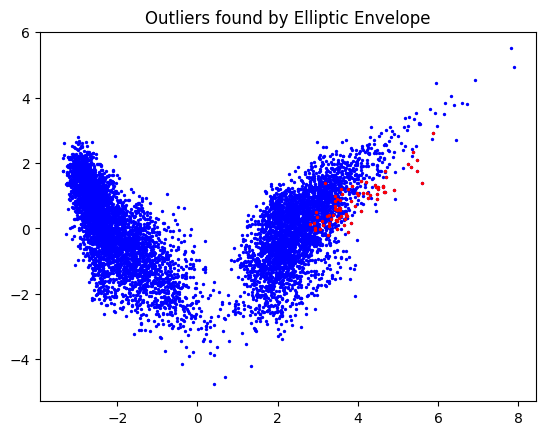

In [ ]:
anomalies_ellenv = where(outliers_ellenv==-1)
anomalies_ellenv = X_train_pca[anomalies_ellenv]

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color='blue', s=2)
plt.scatter(anomalies_ellenv[:,0], anomalies_ellenv[:,1], color='red', s=2)
plt.title("Outliers found by Elliptic Envelope")
plt.show()

# KNN

In [ ]:
!pip install pyod

In [ ]:
from pyod.models.knn import KNN


In [ ]:
clf=KNN(n_neighbors=22, contamination=0.01)
clf.fit(X_train_pca)

KNN(algorithm='auto', contamination=0.01, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=22, p=2,
  radius=1.0)

In [ ]:
clf.decision_scores_

array([0.08362117, 0.07618879, 0.07844947, ..., 0.34909361, 0.54135237,
       0.29888503])

In [ ]:
anomaly_score_knn = clf.decision_function(X_train_pca)


In [ ]:
anomaly_score_knn

array([0.08106836, 0.07503956, 0.07504081, ..., 0.33297318, 0.53162047,
       0.29543194])

In [ ]:
outliers_knn=clf.predict(X_train)
np.unique(outliers_knn, return_counts=True)

(array([0, 1]), array([7281,   71]))

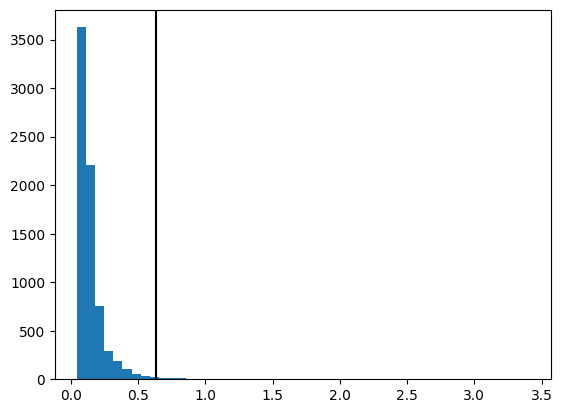

In [ ]:
plt.hist(clf.decision_scores_, bins=50)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers_knn==1)]), c='k')
plt.show()

In [ ]:
np.mean(anomaly_score_knn
[np.where(outliers_knn==1)])

0.783390345933457

In [ ]:
np.mean(anomaly_score_knn
)

0.14882552442890293

In [ ]:
knn_threshold=clf.threshold_

In [ ]:
knn_threshold

0.629046902606241

In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'contamination': 0.1,
 'leaf_size': 30,
 'method': 'largest',
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 20,
 'p': 2,
 'radius': 1.0}

In [ ]:
np.max(anomaly_score_knn
[np.where(outliers_knn==1)])


3.3883262240572565

AttributeError: ignored

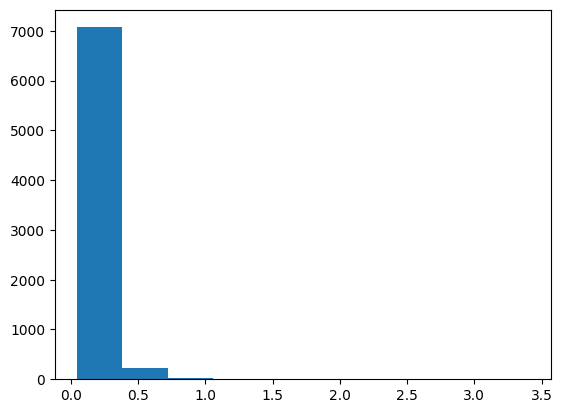

In [ ]:
plt.hist(clf.decision_scores_, bin=100)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers_knn==1)]), c="k")
plt.show()

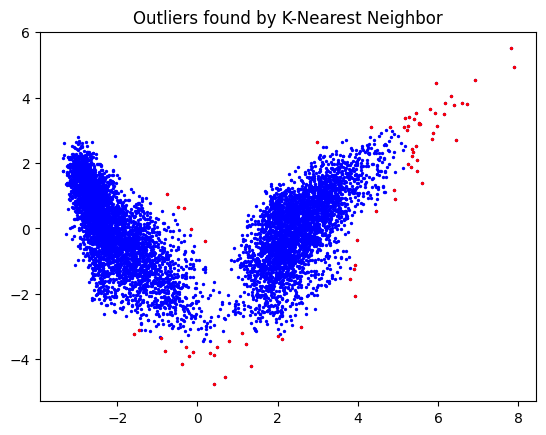

In [ ]:
anomalies_knn = where(outliers_knn==1)
anomalies_knn = X_train_pca[anomalies_knn]

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color='blue', s=2)
plt.scatter(anomalies_knn[:,0], anomalies_knn[:,1], color='red', s=2)
plt.title("Outliers found by K-Nearest Neighbor")
plt.show()

# LOF

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split

In [ ]:
clf=LocalOutlierFactor(n_neighbors=22
                       , novelty=True, contamination=0.01)
clf.fit(X_train_pca)
y_pred=clf.predict(X_test_pca)
y_pred.shape

(2947,)

In [ ]:
X_train_pca.shape

(7352, 2)

In [ ]:
clf.negative_outlier_factor_


array([-1.03877527, -1.00733196, -1.00244013, ..., -1.07768022,
       -1.36182327, -1.0385449 ])

In [ ]:
np.unique(y_pred,return_counts=True)

(array([-1,  1]), array([ 741, 2206]))

In [ ]:
min_val=np.min(clf.negative_outlier_factor_[np.where(y_pred==-1)])


In [ ]:
np.mean(clf.negative_outlier_factor_[np.where(y_pred==-1)])


-1.0391795359505729

In [ ]:
max_val=np.max(clf.negative_outlier_factor_[np.where(y_pred==-1)])

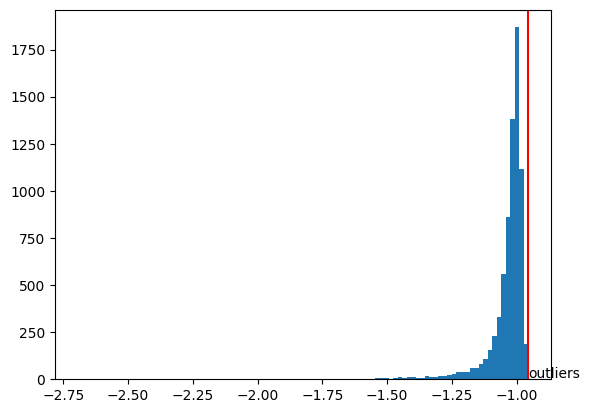

In [ ]:
plt.hist(clf.negative_outlier_factor_, bins=100)
plt.axvline(max_val, c='red')
plt.text(max_val, 10, 'outliers')
plt.show()

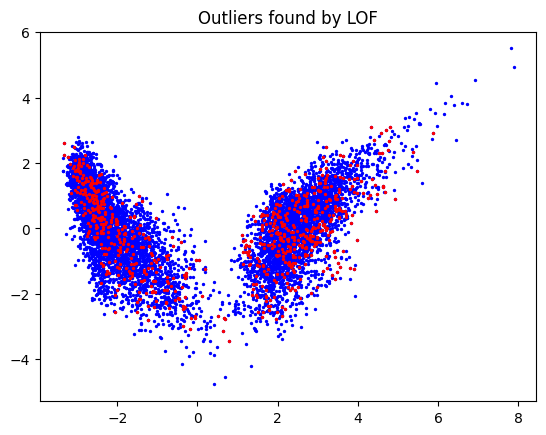

In [ ]:
anomalies_lof = where(y_pred==-1)
anomalies_lof = X_train_pca[anomalies_lof]

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color='blue', s=2)
plt.scatter(anomalies_lof[:,0], anomalies_lof[:,1], color='red', s=2)
plt.title("Outliers found by LOF")
plt.show()

# COF

In [ ]:
!pip install pyod

In [ ]:
from pyod.models.cof import COF

In [ ]:
clf=COF(contamination=0.01)
clf.fit(X_train_pca)

COF(contamination=0.01, method='fast', n_neighbors=20)

In [ ]:
outliers_cof=clf.predict(X_test_pca)
np.unique(outliers_cof,return_counts=True)

(array([0, 1]), array([2887,   60]))

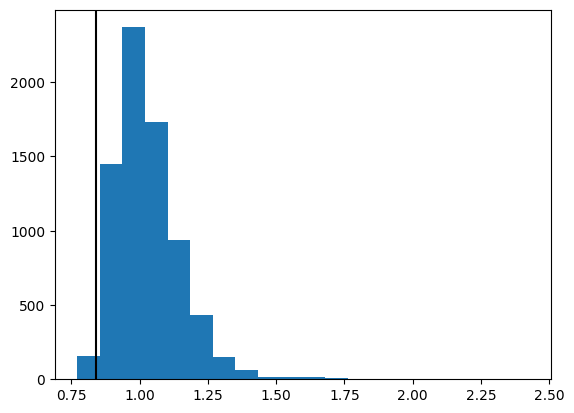

In [ ]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers_cof==1)]), c='k')
plt.show()

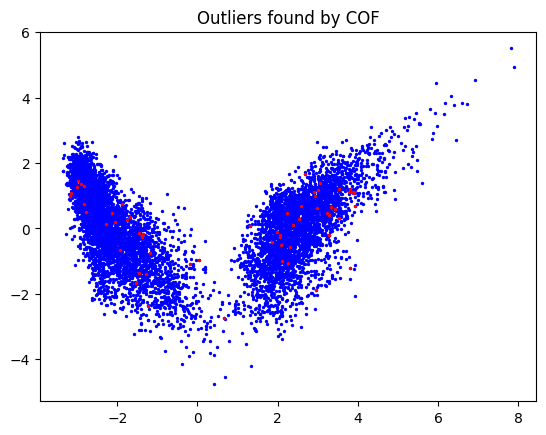

In [ ]:
anomalies_cof = where(outliers_cof==1)
anomalies_cof = X_train_pca[anomalies_cof]

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color='blue', s=2)
plt.scatter(anomalies_cof[:,0], anomalies_cof[:,1], color='red', s=2)
plt.title("Outliers found by COF")
plt.show()

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


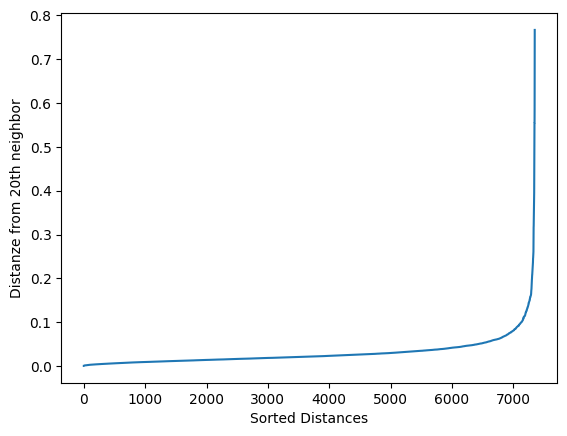

In [ ]:
#con questo vorrei provare a definire l'epsilon
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(X_train_pca)
distances, indices = neighbors_fit.kneighbors(X_train_pca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.ylabel("Distanze from 20th neighbor")
plt.xlabel("Sorted Distances")
plt.plot(distances)

In [ ]:
dbscan=DBSCAN(eps=15, min_samples=163)
dbscan.fit(X_train_pca)

DBSCAN(eps=15, min_samples=163)

In [ ]:
np.unique(dbscan.labels_, return_counts=True)

(array([0]), array([7352]))

In [ ]:
X_train.loc[np.where(dbscan.labels_==-1)]

,0,1,2,10,11,14,22,23,24,26,...,550,551,553,554,555,556,557,558,559,560


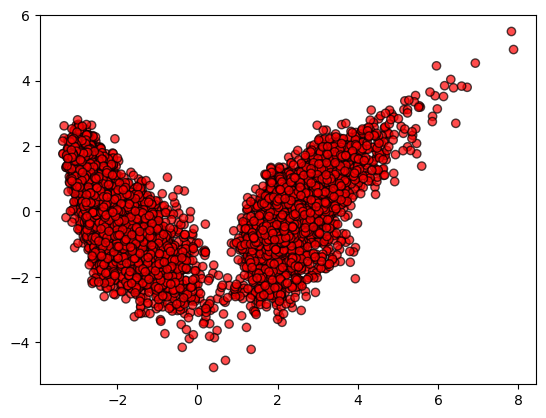

In [ ]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=dbscan.labels_, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

# CBLOF

In [ ]:
from pyod.models.cblof import CBLOF

In [ ]:
cblof=CBLOF(contamination=0.01)
cblof.fit(X_train_pca,y_train)


/usr/local/lib/python3.10/dist-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.01, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False)

In [ ]:
outliers_cblof=cblof.predict(X_train_pca)
np.unique(outliers_cblof, return_counts=True)

(array([0, 1]), array([7278,   74]))

In [ ]:
anomly_score_cblof = cblof.decision_function(X_train_pca)

In [ ]:
np.mean(anomly_score[np.where(outliers_cblof==1)])

3.224138005558836

In [ ]:
cblof.get_params()

{'alpha': 0.9,
 'beta': 5,
 'check_estimator': False,
 'clustering_estimator': None,
 'contamination': 0.01,
 'n_clusters': 8,
 'n_jobs': None,
 'random_state': None,
 'use_weights': False}

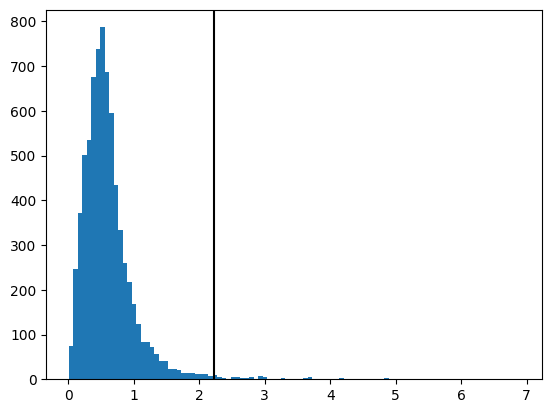

In [ ]:
plt.hist(cblof.decision_scores_, bins=100)
plt.axvline(np.min(cblof.decision_scores_[np.where(outliers_cblof==1)]), c='k')
plt.show()

In [ ]:
threshold_cblof=cblof.threshold_

In [ ]:
X_train.loc[np.where(outliers_cblof.labels_==1)]

AttributeError: ignored

In [ ]:
from numpy import where

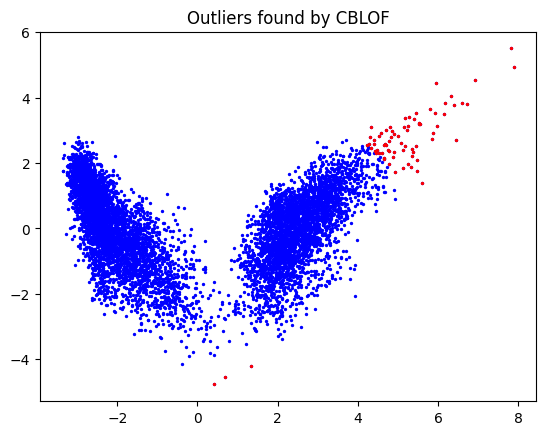

In [ ]:
anomalies_isol = where(outliers_cblof==1)
anomalies_isol = X_train_pca[anomalies_isol]

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color='blue', s=2)
plt.scatter(anomalies_isol[:,0], anomalies_isol[:,1], color='red', s=2)
plt.title("Outliers found by CBLOF")
plt.show()

# ABOD

In [ ]:
from pyod.models.abod import ABOD

In [ ]:
abod=ABOD(n_neighbors=20,contamination=0.01)
abod.fit(X_train_pca)

ABOD(contamination=0.01, method='fast', n_neighbors=20)

In [ ]:
abod.threshold_

-32.0121850519951

In [ ]:
abod.decision_scores_

array([-2.79505155e+05, -6.09199419e+04, -1.71620637e+05, ...,
       -6.41333065e+02, -2.26624531e+01, -2.89166558e+03])

In [ ]:
outliers_abod=abod.predict(X_test_pca)
np.unique(outliers_abod, return_counts=True)

(array([0, 1]), array([2358,  589]))

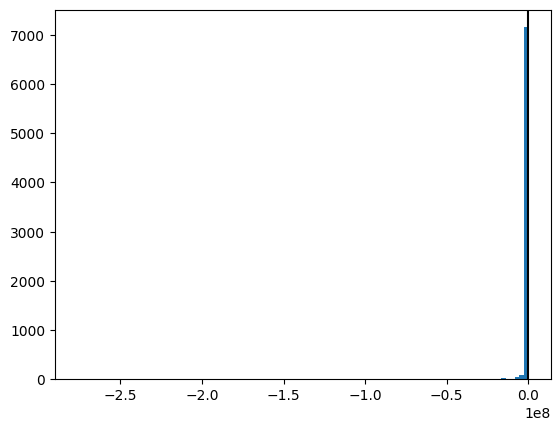

In [ ]:
plt.hist(abod.decision_scores_, bins=100)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers_abod==1)]), c='k')
plt.show()

In [ ]:
np.mean(abod.decision_scores_[np.where(outliers_abod==0)])

-559669.7617708909

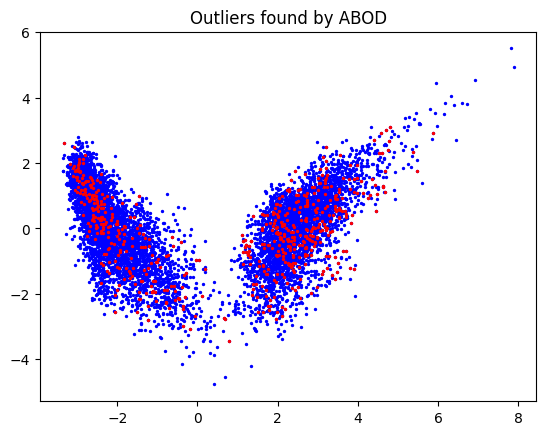

In [ ]:
anomalies_abod = where(outliers_abod==1)
anomalies_abod = X_train_pca[anomalies_abod]

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color='blue', s=2)
plt.scatter(anomalies_abod[:,0], anomalies_abod[:,1], color='red', s=2)
plt.title("Outliers found by ABOD")
plt.show()

# LODA

In [ ]:
from pyod.models.loda import LODA

In [ ]:
clf=LODA(contamination=0.01)
clf.fit(X_train_pca)

LODA(contamination=0.01, n_bins=10, n_random_cuts=100)

In [ ]:
outliers_loda=clf.predict(X_test_pca)
np.unique(outliers_loda, return_counts=True)

(array([0, 1]), array([2941,    6]))

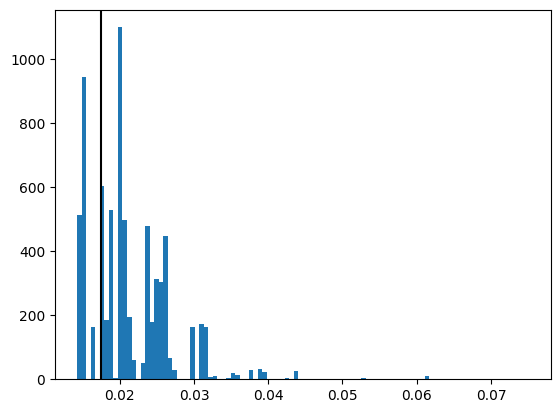

In [ ]:
plt.hist(clf.decision_scores_, bins=100)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers_loda==1)]), c='k')
plt.show()

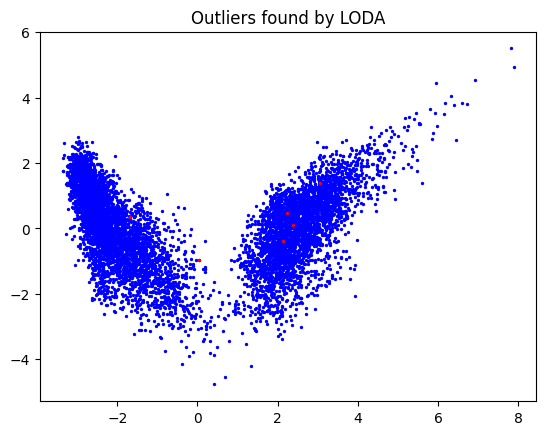

In [ ]:
anomalies_loda = where(outliers_loda==1)
anomalies_loda = X_train_pca[anomalies_loda]

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color='blue', s=2)
plt.scatter(anomalies_loda[:,0], anomalies_loda[:,1], color='red', s=2)
plt.title("Outliers found by LODA")
plt.show()

# ISOLATION FOREST

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

In [ ]:
clf=IsolationForest(max_samples=100, random_state=0,contamination=0.01)
clf.fit(X_train_pca)

IsolationForest(contamination=0.01, max_samples=100, random_state=0)

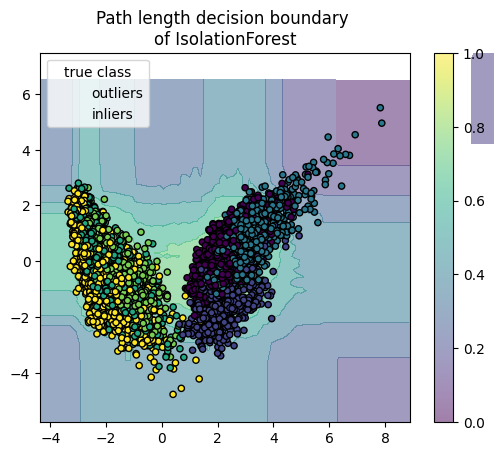

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X_train_pca,
    response_method="decision_function",
    alpha=0.5,
)
disp.ax_.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=20, edgecolor="k")
disp.ax_.set_title("Path length decision boundary \nof IsolationForest")
plt.axis("square")
plt.legend( labels=["outliers", "inliers"], title="true class")
plt.colorbar(disp.ax_.collections[1])
plt.show()


In [ ]:
outliers_isolfor=clf.predict(X_test_pca)
outliers_isolfor = outliers_isolfor.reshape(-1, 1)
np.unique(outliers_isolfor, return_counts=True)

(array([-1,  1]), array([  21, 2926]))

IndexError: ignored

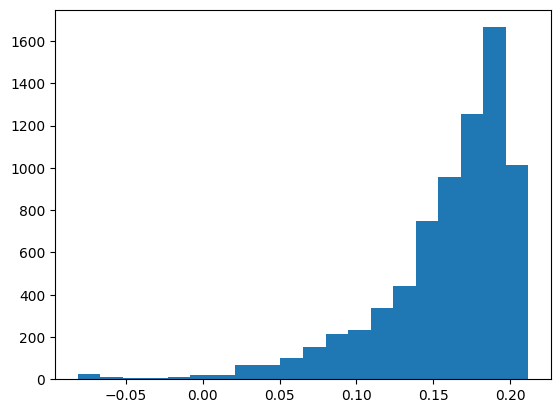

In [ ]:
plt.hist(clf.decision_function(X_train_pca), bins=20)
plt.axvline(np.min(clf.decision_function(X_train_pca)[np.where(outliers_isolfor==1)]), c='k')
plt.show()

IndexError: ignored

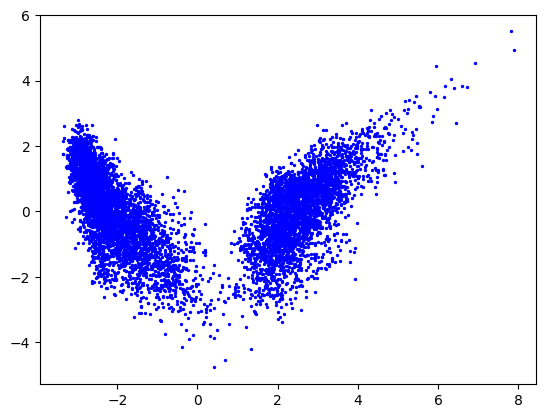

In [ ]:
anomalies_ISOL = where(outliers_isolfor==-1)
anomalies_ISOL = X_train_pca[anomalies_ISOL]

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], color='blue', s=2)
plt.scatter(anomalies_ISOL[:,0], anomalies_ISOL[:,1], color='red', s=2)
plt.title("Outliers found by ISOLATION FOREST")
plt.show()

# EVALUATION OF ALGORITHMS

In [ ]:
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split



# Crea un'istanza dei modelli di anomaly detection
lof = LocalOutlierFactor(novelty=True)
knn = KNeighborsClassifier(n_neighbors=5)
isf = IsolationForest()

# Addestra i modelli sui dati di addestramento
lof.fit(X_train_pca)
knn.fit(X_train_pca, y_train)
isf.fit(X_train_pca)

# Utilizza i modelli per predire le anomalie nei dati di test
lof_preds = lof.predict(X_test_pca)
knn_preds = knn.predict(X_test_pca)
isf_preds = isf.predict(X_test_pca)

# Calcola la precision, il recall e l'F1 score per ogni algoritmo
lof_precision = precision_score(y_test, lof_preds, average="macro")
lof_recall = recall_score(y_test, lof_preds, average="macro")
lof_f1 = f1_score(y_test, lof_preds, average="macro")

knn_precision = precision_score(y_test, knn_preds, average="macro")
knn_recall = recall_score(y_test, knn_preds,average="macro")
knn_f1 = f1_score(y_test, knn_preds,average="macro")

isf_precision = precision_score(y_test, isf_preds, average="macro")
isf_recall = recall_score(y_test, isf_preds, average="macro")
isf_f1 = f1_score(y_test, isf_preds, average="macro")

# Stampa i risultati delle metriche per ogni algoritmo
print("LOF:")
print("Precision:", lof_precision)
print("Recall:", lof_recall)
print("F1 Score:", lof_f1)

print("kNN:")
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)

print("Isolation Forest:")
print("Precision:", isf_precision)
print("Recall:", isf_recall)
print("F1 Score:", isf_f1)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


LOF:
Precision: 0.02930074851257117
Recall: 0.13191244239631336
F1 Score: 0.04795058367795634
kNN:
Precision: 0.37826020873144645
Recall: 0.3535227801860201
F1 Score: 0.34575246827998063
Isolation Forest:
Precision: 0.030325553738665082
Recall: 0.1175115207373272
F1 Score: 0.048209854661467565


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

With the following script we try to perform an interception between three different kind of algorithm on Anomaly Dectection(K-Nearest Neighbor, Elliptic Envelope and Cblof) counting every single possible combination between the three. We found that the outcome of the algorithm share whery few record so, since the idea was to collect much data considered outliers and since we analyze just the presence of 1% of outlierness in the data, we decide to not move them from our dataset. 

In [ ]:
import pandas as pd



# Troviamo l'intersezione degli indici degli outlier usando la funzione 'intersection' di Pandas
common_outliers1 = pd.Index(outliers_cblof).intersection(pd.Index(outliers_knn))
common_outliers2 = pd.Index(outliers_cblof).intersection(pd.Index(outliers_ellenv))
common_outliers3 = pd.Index(outliers_knn).intersection(pd.Index(outliers_ellenv))


# Otteniamo il conteggio e le righe che corrispondono agli outlier comuni
print("Numero di outlier comuni:", len(common_outliers1))
print("Indici degli outlier comuni:", common_outliers1)

# Otteniamo il conteggio e le righe che corrispondono agli outlier comuni
print("Numero di outlier comuni:", len(common_outliers2))
print("Indici degli outlier comuni:", common_outliers2)

# Otteniamo il conteggio e le righe che corrispondono agli outlier comuni
print("Numero di outlier comuni:", len(common_outliers3))
print("Indici degli outlier comuni:", common_outliers3)

# Ora puoi droppare le righe dal dataframe originale usando gli indici comuni
#dataframe_originale = X_train.drop(common_outliers)
# Ora puoi droppare le righe dal dataframe originale usando gli indici comuni
#dataframe_originale = X_train.drop(common_outliers)

# Il dataframe 'dataframe_originale' ora contiene solo le righe che non sono presenti negli outlier comuni.


Numero di outlier comuni: 2
Indici degli outlier comuni: Int64Index([0, 1], dtype='int64')
Numero di outlier comuni: 1
Indici degli outlier comuni: Int64Index([1], dtype='int64')
Numero di outlier comuni: 1
Indici degli outlier comuni: Int64Index([1], dtype='int64')


In [ ]:
threshold = cblof.threshold_ # Or other value from the above histogram

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)



In [ ]:
descriptive_stat_threshold(X_train,anomly_score_cblof, threshold_cblof)



,Group,Count,Count %,0,1,2,10,11,14,22,...,551,553,554,555,556,557,558,559,560,Anomaly_Score
0,Normal,7278,98.993471,0.27,-0.02,-0.11,-0.31,-0.56,0.61,-0.11,...,0.13,-0.63,0.01,0.00,0.01,-0.00,-0.49,0.06,-0.06,0.59
1,Outlier,74,1.006529,0.26,-0.02,-0.12,0.28,0.04,0.33,0.29,...,0.15,-0.62,-0.05,-0.02,0.34,-0.23,-0.68,0.20,0.10,3.22


In [ ]:
descriptive_stat_threshold(X_train,anomaly_score_knn, knn_threshold)

,Group,Count,Count %,0,1,2,10,11,14,22,...,551,553,554,555,556,557,558,559,560,Anomaly_Score
0,Normal,7281,99.034276,0.27,-0.02,-0.11,-0.31,-0.56,0.61,-0.11,...,0.13,-0.62,0.01,0.0,0.01,-0.01,-0.49,0.06,-0.06,0.14
1,Outlier,71,0.965724,0.23,0.02,-0.10,0.13,-0.10,0.43,0.12,...,0.07,-0.66,-0.02,0.1,0.08,-0.08,-0.42,0.12,0.04,0.96
